# Selección de variables

Nuestro objetivo es decidir qué variables son interesantes y cuáles no lo son, para ello utilizaremos métodos de regularización.

Los métodos de regularización son utilizados para la selección del modelo y para evitar el sobreajuste en las técnicas predictivas. El problema de la colinealidad impide obtener estimaciones y predicciones fiables a través de mínimos cuadrados, por lo que se ha de recurrir a los métodos de regresión regularizada como son **Ridge**, **Lasso**, y **Elastic Net**.

Estos métodos también se utilizan cuando el número de variables es muy grande, ya que utilizando alguno de ellos podemos descartar algunas variables y crear nuestro modelo más simple e interpretable.

In [2]:
# Bibliotecas importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn style
sns.set()

In [10]:
# specific libraries
from sklearn.model_selection import train_test_split


## The data

In [4]:
data = pd.read_csv('../datasets/boston/Boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Variables

In [16]:
colnames = data.columns.tolist()
predictors = colnames[:len(colnames) - 1]
target = colnames[-1]
X = data[predictors]
y = data[target]

(X.shape, y.shape)

((506, 13), (506,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=42)

## Regresión Lasso

Técnica de regresión lineal que, mediante la contracción de los coeficientes, logra estabilizar las estimaciones y predicciones, realizando una selección de variables.

Lasso produce, a partir de cierto valor del parámetro de complejidad, estimaciones nulas para algunos coeficientes y no nulas para otros coeficientes de forma continua, debido a la norma **L1**. Lasso reduce la variabilidad de las estimaciones por la reducción de los coeficientes y al mismo tiempo produce modelos interpretables por la reducción de algunos coeficientes a cero.

En general, los modelos generalizados *Lasso* son muchos más fáciles de interpretar que los modelos obtenidos mediante **Ridge**.

Utilizando *Lasso* tendríamos un modelo con buena precisión e interpretable, pero este método tiene varias limitaciones.

* En el caso $p > n$, *Lasso* selecciona a lo sumo $n$ variables antes de saturarse. Esto es una limitación para un método de selección de variables.
* Si hay un grupo de variables entre las cuales las correlaciones por parejas son muy altas, *Lasso* tiende a seleccionar sólo una variable del grupo, sin importarle cuál de ellas selecciona.
* Para el caso $n > p$, si hay una alta correlación entre predictores, se ha observado que, en general, la predicción a través de la regresión **Ridge** resulta más optima que la obtenida a través de *Lasso*.

### Comparación entre Ridge y Lasso

1. Está claro que Lasso al hacer selección de variables tiene una gran ventaja sobre la regresion Ridge, ya que produce modelos más simples y más interpretables que implica un único subconjunto de los predictores. Sin embargo, no hay un método que siempre domine al otro.
2. En general, se podría esperar que Lasso fuese mejor en un entorno en el que un número relativamente pequeño de predictores tiene coefcientes sustanciales, y los restantes predictores tienen coefcientes que son muy pequeños o iguales a cero.
3. Regresión Ridge obtiene mejores resultados cuando la respuesta es una función de muchos factores predictivos, todos con coefcientes de aproximadamente el mismo tamaño. Sin embargo, el número de predictores que se relaciona con la respuesta no se conoce a priori para los conjuntos de datos reales.
4. Una técnica tal como la validación cruzada se puede utilizar con el fin de determinar qué enfoque es mejor en un conjunto de datos particular.
5. Al igual que la regresión Ridge, cuando las estimaciones de mínimos cuadrados tiene excesivamente alta varianza, la solución Lasso puede producir una reducción de la varianza a expensas de un pequeño aumento de sesgo, y por tanto, puede generar predicciones mas exactas.

In [12]:
# Import Lasso
from sklearn.linear_model import Lasso

[-9.63384672e-02  3.36609746e-02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  3.42182673e+00 -1.93816656e-03 -9.62894944e-01
  2.40384874e-01 -1.32055013e-02 -7.33431321e-01  1.25756507e-02
 -6.32384664e-01]


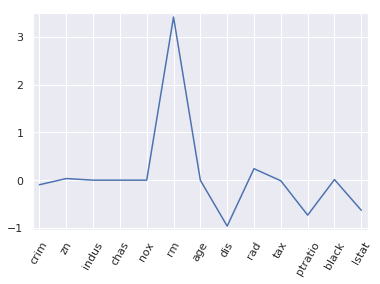

In [20]:
# Names
names = data.drop('medv', axis=1).columns.tolist()

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4)

# Fit the regressor to the data
lasso.fit(X_train, y_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.margins(0.02)
plt.show()

## Regresión Ridge

Cuando utilizamos modelos de regresión podemos utilizar este método para eludir los efectos adversos del problema de colinealidad.

In [ ]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [3]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

NameError: name 'X' is not defined